# **Data Cleaning**
**Bad data could be:**

1. Wrong data
2. Data in wrong format
3. Duplicates
4. Empty cells/missing values
5. Outliers

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.DataFrame({"Age": [15,18,"18", 19.4,"20+"],
"Gender": ["male", "female", "female", "female", "male"]})

df

,Age,Gender
0,15,male
1,18,female
2,18,female
3,19.4,female
4,20+,male


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     5 non-null      object
 1   Gender  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [5]:
# continous - float or int

# discrete count - int

# discrete categorical - object

In [5]:
df["Age"].unique()

array([15, 18, '18', 19.4, '20+'], dtype=object)

1) **Wrong Data**

- **Solution is Replace**

In [7]:
df["Age"] = df["Age"].replace({"20+":20})

df

,Age,Gender
0,15,male
1,18,female
2,18,female
3,19.4,female
4,20,male


In [9]:
df.dtypes  # Age will still show object because there is still a string '18'.

Age       object
Gender    object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     5 non-null      object
 1   Gender  5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


 **2) Wrong Datatype**

- Solution: Convert the data type

In [11]:
df["Age"].astype('float')

0    15.0
1    18.0
2    18.0
3    19.4
4    20.0
Name: Age, dtype: float64

In [13]:
df["Age"] = df["Age"].astype('float')
df

,Age,Gender
0,15.0,male
1,18.0,female
2,18.0,female
3,19.4,female
4,20.0,male


In [14]:
df.dtypes

,0
Age,float64
Gender,object


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     5 non-null      float64
 1   Gender  5 non-null      object 
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


- **If we want the values to be replaced**


In [15]:
df["Age"] = df["Age"].replace({19.4:20,20:40})
df

,Age,Gender
0,15.0,male
1,18.0,female
2,18.0,female
3,20.0,female
4,40.0,male


- Remember the replace function replaces the values in multiple rows if present

In [17]:
df["Age"].replace({18:24})

0    15.0
1    24.0
2    24.0
3    20.0
4    40.0
Name: Age, dtype: float64

- If we want specific value even if it is present multiple times

In [19]:
df.iloc[2,0] = 24
df

,Age,Gender
0,15.0,male
1,18.0,female
2,24.0,female
3,20.0,female
4,40.0,male


In [21]:
df.iloc[[0,1,2],0] = [25,21,21]
df

,Age,Gender
0,25.0,male
1,21.0,female
2,21.0,female
3,20.0,female
4,40.0,male


# **3. Duplicates**

- Due to any data entry mistake : replace (collect orginal data)
- Solution: Remove

In [23]:
#to check the duplicated records
df.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [25]:
#total no. of duplicates in given data
df.duplicated().sum()

1

In [25]:
#to extract duplicate records -- > df[condition]
df[df.duplicated()]

,Age,Gender
2,21.0,female


In [29]:
#to extract non duplicated records

df[~df.duplicated()]

,Age,Gender
0,25.0,male
1,21.0,female
3,20.0,female
4,40.0,male


In [25]:
df = df.drop_duplicates()

In [27]:
df

,Age,Gender
0,25.0,male
1,21.0,female
3,20.0,female
4,40.0,male


In [29]:
# to remove the duplictes
df = df.drop_duplicates(ignore_index = True)
df

,Age,Gender
0,25.0,male
1,21.0,female
2,20.0,female
3,40.0,male


# **Missing values**

- option 1 : drop/ remove the msissing values

  - Any column having >30% data as missing, drop that column

or

- option-2 : replace with original data (collect data frombackednd team)

or

- option-3 : replace statistically

   - continous : replace with mean (if no outliers)

   - continous : replace with median (if outliers)

   - discrete : replace with mode

- Solution: Either remove or replace

In [35]:
#percentage of missing values in each column

df.isnull().sum()/len(df)

Age       0.166667
Gender    0.333333
dtype: float64

In [ ]:
df = pd.read_excel(r"C:\Users\admin\Desktop\ex.xlsx")
df

In [33]:
df = pd.DataFrame({"Age": [15,np.nan, 24, 19, 20, 22],
"Gender":["male",np.nan, "female", "female",np.nan, "male"]})

df

,Age,Gender
0,15.0,male
1,NaN,NaN
2,24.0,female
3,19.0,female
4,20.0,NaN
5,22.0,male


In [37]:
# Option - 1
df.dropna()

,Age,Gender
0,15.0,male
2,24.0,female
3,19.0,female
5,22.0,male


In [39]:
df

,Age,Gender
0,15.0,male
1,NaN,NaN
2,24.0,female
3,19.0,female
4,20.0,NaN
5,22.0,male


In [41]:
df.fillna(20)        # TO fill the missing values

,Age,Gender
0,15.0,male
1,20.0,20
2,24.0,female
3,19.0,female
4,20.0,20
5,22.0,male


In [43]:
df["Age"].fillna(20)

0    15.0
1    20.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: Age, dtype: float64

In [45]:
df["Gender"].fillna("male")

0      male
1      male
2    female
3    female
4      male
5      male
Name: Gender, dtype: object

In [47]:
# Option - 2
df.drop(index = [1,4])

,Age,Gender
0,15.0,male
2,24.0,female
3,19.0,female
5,22.0,male


In [49]:
df

,Age,Gender
0,15.0,male
1,NaN,NaN
2,24.0,female
3,19.0,female
4,20.0,NaN
5,22.0,male


In [51]:
#percentage of missing values in each column

df.isnull().sum()/len(df)

Age       0.166667
Gender    0.333333
dtype: float64

# **Outliers**

-  **What is outlier?**              --> A data vlue which is far away from other data points is called Outlier
-  **How to calculate an outlier?**  --> Calculate your upper limit of Outlier = Q3 + (1.5 * IQR),  lowerlimit of Outliere = Q1 – (1.5 * IQR.  )
- **How to identify outliers**      - > We are going to identify the Outliers using Boxplot
- **How to extract outliers**      --> df[(df["marks"]<lower_limit) | (df["marks"]>upper_limit)]
- **How to treat outliers**        --> 3R Technique

In [68]:
df= pd.DataFrame({"marks": [10,11,12, 25,25, 27, 31, 33, 34, 34, 36, 36,43, 50,59]})
df

,marks
0,10
1,11
2,12
3,25
4,25
5,27
6,31
7,33
8,34
9,34


**Various ways of finding the outlier.**

1. Boxplot

             Identifying Outliers based on boxplot

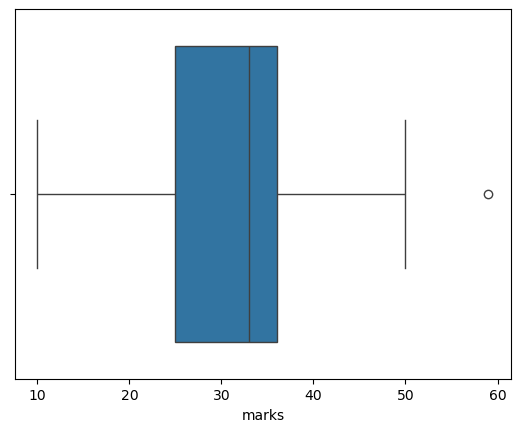

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df["marks"])
plt.show()

- **How to treat outliers?**
 
# **Solution: 3R Technique**

**1. Remove**
- Remove outliers from dataset
- Problem : Sometimes, though we have removed outliers, still some outliers will be present
- Reason : After removing the outliers on given data, now new outliers will be calculated based on new data (for new
data, Q1, Q3, IQR will be recalculated)
- Based on this, we should not remove outliers

**2. Replace the ouliers**

- Replace by collecting the original data

- Replace by statistically with upper limit & lower limit (Winsorization)

- Winsorization : Any value > Q3+1.5*IQR replace with Q3+1.5*IQR

                  Any value < Q1-1.5*IQR replace with Q1-1.5*IQR



**3. Retain (consider for analysis)** --- > Treat them separately


In [ ]:
# To find Outliers


- **Remove**

In [78]:
df.drop(index = [14])

,marks
0,10
1,11
2,12
3,25
4,25
5,27
6,31
7,33
8,34
9,34


 **Replace**

- based on confirmation from data engineer team / based on research / based on domain expertise

Replace based on statistics

- winsorization - replacing the outliers statiscally with lower_linit & upper_limit values

In [85]:
df['marks'] = df['marks'].clip(lower=8.5,upper=52.5)

df

,marks
0,10.0
1,11.0
2,12.0
3,25.0
4,25.0
5,27.0
6,31.0
7,33.0
8,34.0
9,34.0


<Axes: xlabel='marks'>

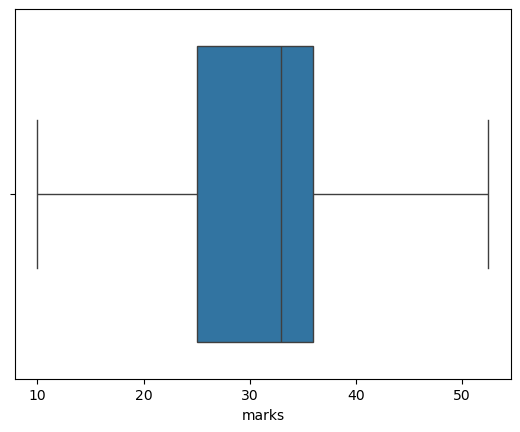

In [87]:
sns.boxplot(x=df["marks"])

# Entire Data Cleaning depends on
- Which particular Project, you are working
- Scenario

    - for Data Cleaning, there is no fixed rule

      (if there is any fixed rule, then we can create directly a user defined function with if elese)

      For all datasets, every step is fixed based on condition (then no need hire a data scientist)